In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('C:\\Users\\ADMIN\\Documents\\Datasets\\BigBasket\\bigBasketCSV.csv')
#raw = pd.read_csv('C:\\Users\\Mk\\Documents\\Datasets\\BigBasket\\bigBasket.csv')

In [3]:
raw.head()

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014,Other Sauces
1,M09736,6468572,15669800,22-09-2014,Cashews
2,M09736,6468572,34989501,22-09-2014,Other Dals
3,M09736,6468572,7572303,22-09-2014,Namkeen
4,M09736,6468572,15669856,22-09-2014,Sugar


#Data Cleaning

In [4]:
#Finding NaN
NanCount = raw.isna().sum()
NanCount

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [5]:
#Finding mistake in text columns
UniqueItems = raw['Description'].unique()
UniqueItems.shape

(216,)

In [6]:
CntUniqueItems = np.zeros(len(UniqueItems))
for i in range(len(UniqueItems)):
    CntUniqueItems[i] = raw[raw['Description'] == UniqueItems[i]]['Description'].count()

(array([7.439e+03, 3.052e+03, 1.628e+03, 2.538e+03, 1.082e+04, 3.801e+03,
        5.446e+03, 4.135e+03, 1.889e+03, 1.675e+03, 5.695e+03, 3.018e+03,
        1.282e+03, 5.550e+02, 7.150e+02, 5.240e+02, 2.220e+02, 1.077e+03,
        3.030e+02, 1.579e+03, 4.720e+02, 2.650e+02, 1.750e+02, 4.720e+02,
        8.270e+02, 1.050e+02, 1.770e+02, 7.560e+02, 1.230e+02, 4.500e+02,
        1.250e+02, 8.100e+01, 1.020e+02, 4.800e+01, 4.700e+01, 5.600e+01,
        6.300e+01, 1.410e+02, 1.700e+01, 5.800e+01, 3.700e+01, 1.600e+01,
        4.100e+01, 3.700e+01, 1.600e+01, 8.000e+00, 9.000e+00, 1.200e+01,
        7.000e+00, 5.000e+00]),
 array([  0. ,   4.3,   8.6,  12.9,  17.2,  21.5,  25.8,  30.1,  34.4,
         38.7,  43. ,  47.3,  51.6,  55.9,  60.2,  64.5,  68.8,  73.1,
         77.4,  81.7,  86. ,  90.3,  94.6,  98.9, 103.2, 107.5, 111.8,
        116.1, 120.4, 124.7, 129. , 133.3, 137.6, 141.9, 146.2, 150.5,
        154.8, 159.1, 163.4, 167.7, 172. , 176.3, 180.6, 184.9, 189.2,
        193.5, 197.8,

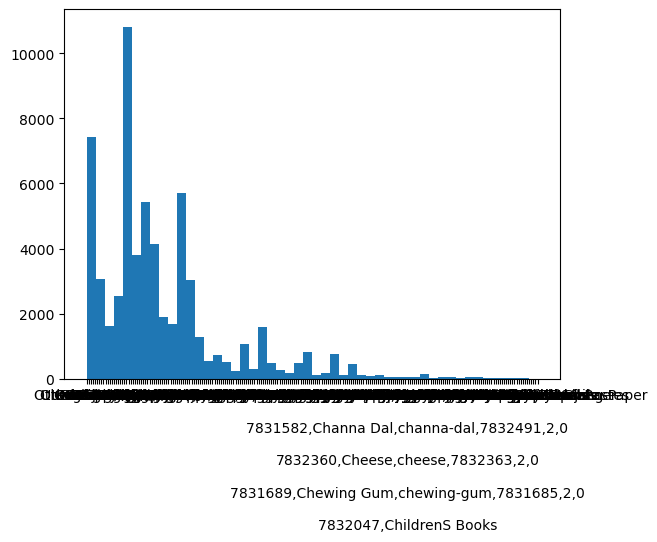

In [7]:
plt.hist(raw['Description'], bins=50)

In [8]:
UniqueItems.sort()

In [9]:
for i in range(len(UniqueItems)):
    print(UniqueItems[i],'\n')

After Shave 

Agarbatti 

Almonds 

Aluminium Foil & Cling Wrap 

Antiseptics 

Avalakki / Poha 

Ayurvedic 

Ayurvedic Food 

Baby Care Accessories 

Baby Cereal 

Bakery & Breads 

Baking Ingredients 

Banana 

Basmati Rice 

Battery 

Beans 

Besan 

Beverages 

Biscuits 

Body Lotion 

Body Wash 

Boiled Rice 

Bottle & Tin Openers 

Bread 

Brinjals 

Brooms & Dust Pans 

Brushes & Scrubbers 

Buns & Pavs 

Butter & Cream 

Buttermilk 

CFLs,cfls,7832553,2,0

7831582,Channa Dal,channa-dal,7832491,2,0

7832360,Cheese,cheese,7832363,2,0

7831689,Chewing Gum,chewing-gum,7831685,2,0

7832047,ChildrenS Books 

Cakes 

Car Freshener 

Car Shampoo & Wax 

Cashews 

Chilli & Soya Sauces 

Chinese Noodles 

Chips 

Chocolate 

Cleaning & Dust Cloth 

Colours  

Containers 

Cookery Books 

Cookies 

Cooking Paste 

Cooking Sauce 

Corn Snacks 

Cotton & Bandages 

Cream Biscuits 

Curd 

Cut Vegetables 

Cutlery 

Cutters, Peelers & Scrapers 

Dairy & Cheese 

Diapers & Wipes 

Dishwash Li

Modify following Items
Festive Gift Pack, Festive Gift Packs 
Soup, Soups
Toilet Cleaners, Toilet Cleaning

In [10]:
# Replace item names
#UniqueItems = raw['Description'].unique()
raw_process = raw.copy()
raw_process['Description'] = raw_process['Description'].replace('Festive Gift Pack', 'Festive Gift Packs')
raw_process['Description'] = raw_process['Description'].replace('Soup', 'Soups')
raw_process['Description'] = raw_process['Description'].replace('Toilet Cleaning', 'Toilet Cleaners')


In [11]:
#Change 'Created On' to Date Format YYYY-MM-DD
raw_process['Created On'] = pd.to_datetime(raw['Created On'], dayfirst=True)

In [13]:
#Check dates are consecutive
raw_process['Created On Temp'] = raw_process['Created On']
raw_process['Created On Temp'] = raw_process['Created On'][1:]
if ~(len(raw_process[raw_process['Created On Temp']<raw_process['Created On']])):
    print('Dates are consecutive')
else:
    print('Dates are not consecutive')

Dates are consecutive


#Data Cleaning is completed

# Product Wise Analysis
## Data Preparation

In [123]:
y = pd.get_dummies(raw_process[['Order', 'Description']],  dtype=float, prefix='')

In [124]:
y.head()

,Order,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
0,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6468572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
OneHotCoded = y.groupby(y['Order']).sum()
OneHotCoded.replace(0,np.nan)

,_After Shave,_Agarbatti,_Almonds,_Aluminium Foil & Cling Wrap,_Antiseptics,_Avalakki / Poha,_Ayurvedic,_Ayurvedic Food,_Baby Care Accessories,_Baby Cereal,...,_Vanaspati,_Veg & Fruit,_Vermicelli,_Vinegar,_Wafers,_Washing Bars,_Whole Grains,_Whole Spices,_Womens Deo,_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6422636,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6423338,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6423534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6423959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8387967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8388196,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [65]:
OneHotCoded.head()

,Description_After Shave,Description_Agarbatti,Description_Almonds,Description_Aluminium Foil & Cling Wrap,Description_Antiseptics,Description_Avalakki / Poha,Description_Ayurvedic,Description_Ayurvedic Food,Description_Baby Care Accessories,Description_Baby Cereal,...,Description_Vanaspati,Description_Veg & Fruit,Description_Vermicelli,Description_Vinegar,Description_Wafers,Description_Washing Bars,Description_Whole Grains,Description_Whole Spices,Description_Womens Deo,Description_Yogurt & Lassi
Order,,,,,,,,,,,,,,,,,,,,,
6422558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6422636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6423338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
6423534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6423959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#TEST CODE
"""temp = df_new.iloc[2]>0
temp = temp.to_numpy()
df_new.iloc[2,temp]"""

'temp = df_new.iloc[2]>0\ntemp = temp.to_numpy()\ndf_new.iloc[2,temp]'

In [126]:
Column_sum = np.zeros(OneHotCoded.shape[1])
Column_avg = np.zeros(OneHotCoded.shape[1])
column_std = np.zeros(OneHotCoded.shape[1])
for i in range(OneHotCoded.shape[1]):
    Column_sum[i] = OneHotCoded.iloc[:,i].sum()
    Column_avg[i] = OneHotCoded.iloc[:,i].mean()
    column_std[i] = OneHotCoded.iloc[:,i].std()

In [127]:
d = {'Items': OneHotCoded.columns, 'Sum': Column_sum, 'Avg': Column_avg, 'STD': column_std}
df_new = pd.DataFrame(d)
df_new = df_new.sort_values(by=['Sum'])

<Axes: xlabel='Items'>

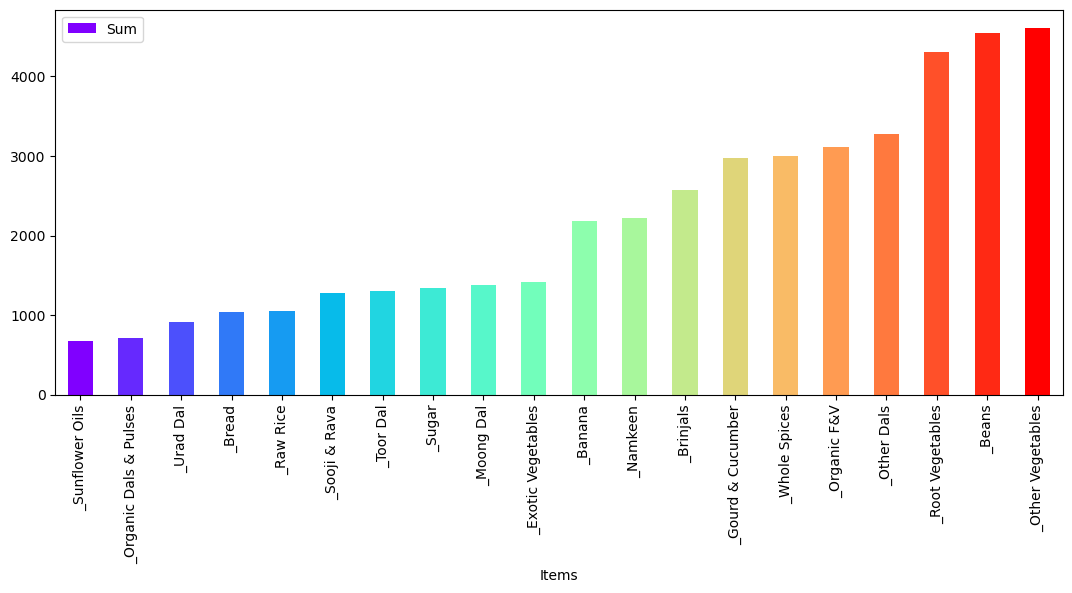

In [128]:
color = plt.cm.rainbow(np.linspace(0, 1, 20))

df_new.tail(20).plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

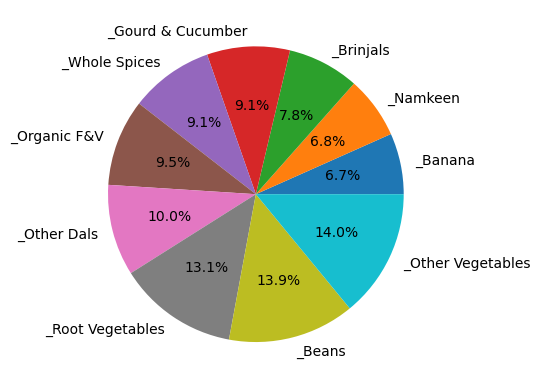

In [129]:
plt.pie(df_new['Sum'].tail(10), labels = df_new['Items'].tail(10), autopct='%1.1f%%')
plt.show() 

<Axes: xlabel='Items'>

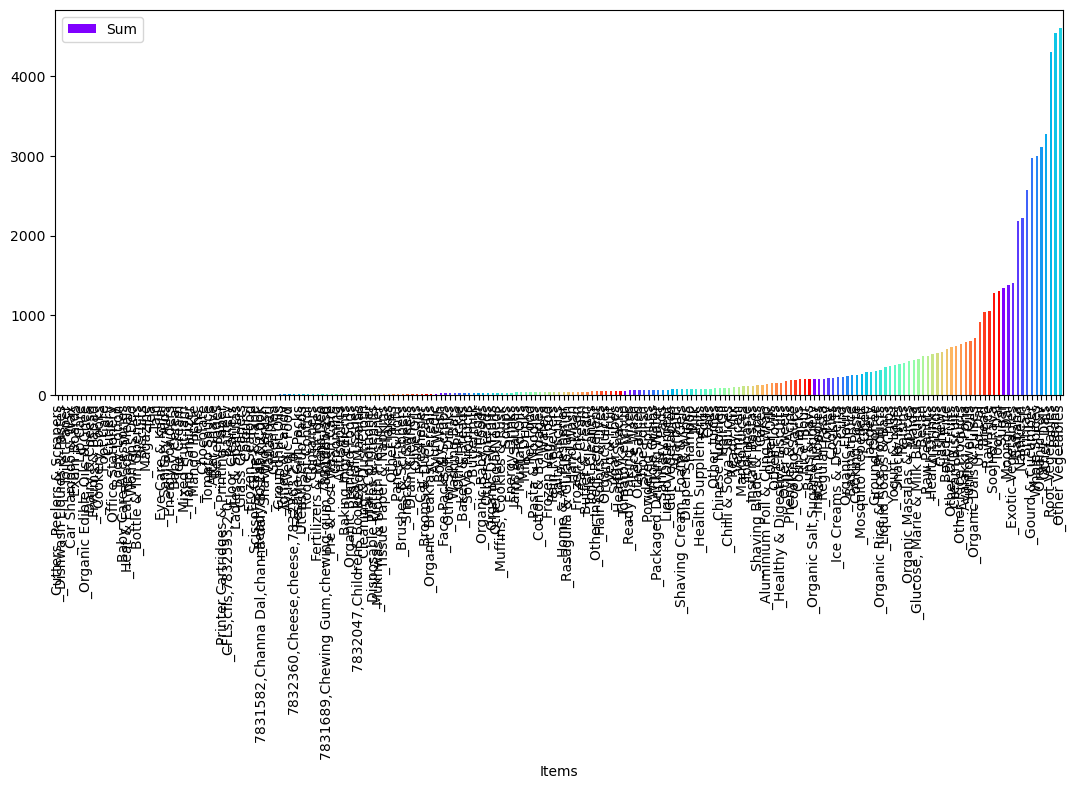

In [131]:
df_new = df_new.sort_values(by=['Sum'])

color = plt.cm.rainbow(np.linspace(0, 1, 40))

df_new.plot.bar(x='Items', y='Sum',color=color, figsize=(13,5))

In [133]:
FastItems = df_new[df_new['Sum']>1000] #Tune threshold value
print(FastItems)

                  Items     Sum       Avg       STD
23               _Bread  1044.0  0.124478  0.343597
165           _Raw Rice  1056.0  0.125909  0.336052
185       _Sooji & Rava  1281.0  0.152736  0.416873
199           _Toor Dal  1305.0  0.155598  0.371592
188              _Sugar  1344.0  0.160248  0.369126
115          _Moong Dal  1383.0  0.164898  0.451162
62   _Exotic Vegetables  1410.0  0.168117  0.506687
12              _Banana  2188.0  0.260880  0.440496
121            _Namkeen  2224.0  0.265172  0.783525
24            _Brinjals  2569.0  0.306307  0.534756
80    _Gourd & Cucumber  2973.0  0.354477  0.580831
210       _Whole Spices  3001.0  0.357816  0.907687
131        _Organic F&V  3113.0  0.371170  1.132186
137         _Other Dals  3272.0  0.390128  0.873839
173    _Root Vegetables  4303.0  0.513056  0.670253
15               _Beans  4549.0  0.542387  0.774449
151   _Other Vegetables  4606.0  0.549183  0.701304


<Axes: xlabel='Items'>

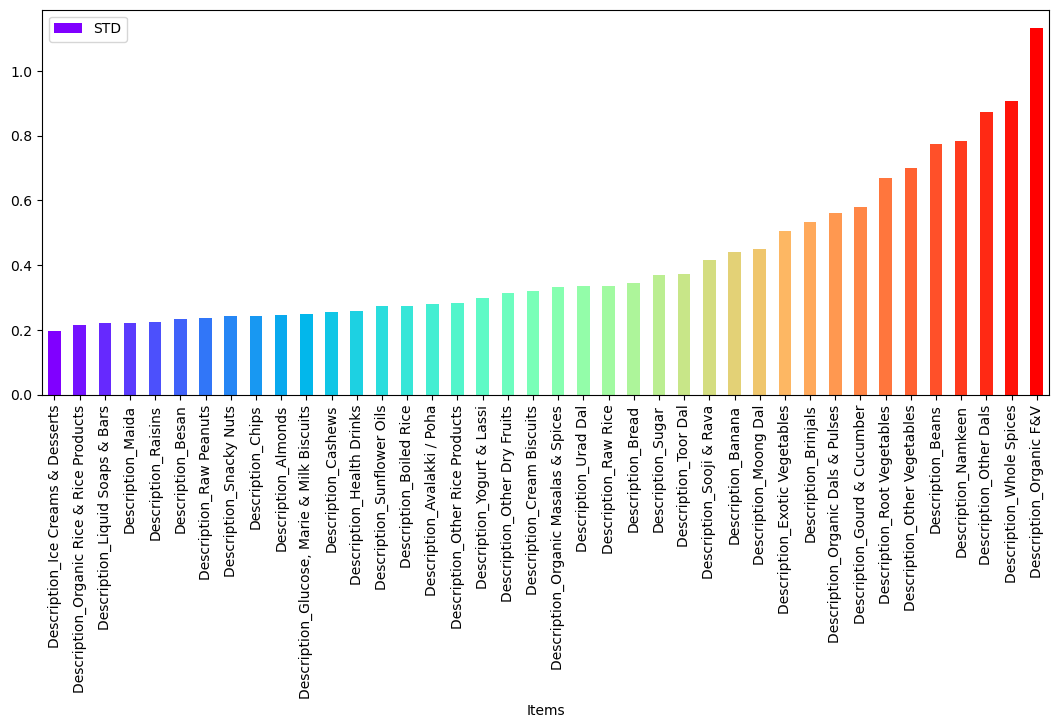

In [112]:
df_new = df_new.sort_values(by=['STD'])
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df_new.tail(40).plot.bar(x='Items', y='STD',color=color, figsize=(13,5))

In [134]:
from sklearn.cluster import KMeans

In [150]:
X = np.array(df_new['Sum'])
X = X.reshape(-1,1)
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [151]:
t = np.array(kmeans.labels_)

In [152]:
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1])